# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [6]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

The null hypothesis in this study is that names do not effect the chances of the person getting a callback, the alternative hypothesis is that having either a black or white sounding name will have a different level of success for call backs.
The sample size is 4870, which satisfies the Central Limit Theorem condition of having more than 30 samples.

In [7]:
data.groupby(['race','call']).size().unstack()

call,0.0,1.0
race,,
b,2278,157
w,2200,235


In [8]:
print("There average chance of a black sounding name getting a call back is approximately {0:1.3f}% where as for a white sounding name is seems to be {1:1.3f}%".format(157*100/(2278+157),235*100/(2200+235)))

There average chance of a black sounding name getting a call back is approximately 6.448% where as for a white sounding name is seems to be 9.651%


While it appears that black sounding names is lower than whites we must have addition tests so that we can have a better conclusion.

In [11]:
w = data[data.race=='w']
b = data[data.race=='b']
#Calculate the proportions of black and white sounding names
w_prop = sum(w.call) / len(w.call)
b_prop = sum(b.call) / len(b.call)
#Calculate std
w_std = np.std(w.call)
b_std = np.std(b.call)
#Calculate mean
w_mean = np.mean(w.call)
b_mean = np.mean(b.call)
bw_mean = np.mean(data.call)

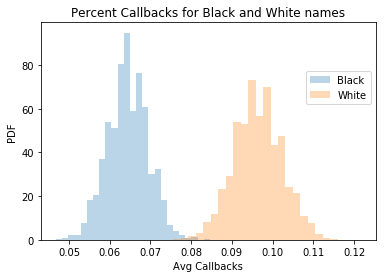

In [12]:
#We can use CLT to create a normal distribution for both white and black sounding names.
#Boot strap replicate 
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        # Applies function on a random set of data points
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

#Generate boot strap replicas of the call backs
black_cb = draw_bs_reps(b.call, np.mean, 5000)
white_cb = draw_bs_reps(w.call, np.mean, 5000)
#Construct histogram of results
plt.hist(black_cb, bins=25, density=True, alpha=.3)
plt.hist(white_cb, bins=25, density=True, alpha=.3)
plt.legend(["Black","White"],bbox_to_anchor=(1,.8))
plt.xlabel("Avg Callbacks")
plt.ylabel("PDF")
plt.title("Percent Callbacks for Black and White names")
plt.show()

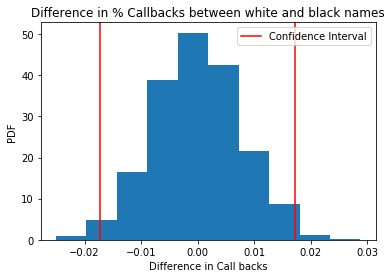

In [13]:
#Create a bootstrap replicate
norm_call_w = w.call - w_mean + bw_mean
norm_call_b = b.call - b_mean + bw_mean

#Generate bootstrap replicas of call backs
w_bs = draw_bs_reps(norm_call_w, np.mean, 5000)
b_bs = draw_bs_reps(norm_call_b, np.mean, 5000)

#Get difference of means
w_bs = w_bs - b_bs

plt.hist(w_bs, density = True)
conf_int = np.percentile(w_bs,[1.25,98.75])
plt.axvline(x=conf_int[0],color='r')
plt.axvline(x=conf_int[1],color='r')
plt.legend(['Confidence Interval'])
plt.ylabel('PDF')
plt.xlabel('Difference in Call backs')
plt.title('Difference in % Callbacks between white and black names')
plt.show()

The analysis shows that name is an important factor in callback success, however it does not mean that it is the only factor. More tests need to be done in order to show which factors affect callback success.